In [49]:
import re
import pandas as pd

def extract_values_from_file(file_path,cpus):
    time = re.compile(r'That took (\S+) seconds')

    cpu_list = []
    time_list = []

    for cpu in cpus:
        with open(f"../result/thread_1_task_{cpu}.out", 'r') as file:
            content = file.read()

            time_matches = time.findall(content)

            for times in time_matches:
                cpu_list.append(cpu)
                time_list.append(float(times))

    data = {'cpus': cpu_list, 'runtime': time_list}
    #df_new = pd.DataFrame(data)
    #df.oncat([df,df_new])
    return cpu_list, time_list, data


def new_extract_values_from_file(file_path,cpus):
    time = re.compile(r' took (\S+) seconds')

    cpu_list = []
    time_list = []

    for cpu in cpus:
        with open(f"../result/task_{cpu}.out", 'r') as file:
            content = file.read()

            time_matches = time.findall(content)

            for times in time_matches:
                cpu_list.append(cpu)
                time_list.append(float(times))

    data = {'cpus': cpu_list, 'runtime': time_list}
    #df_new = pd.DataFrame(data)
    #df.oncat([df,df_new])
    return cpu_list, time_list, data



   cpus     runtime
0     1  134.058007
1     2   66.225356
2     4   33.025642
3     8   16.495332
4    16    8.607952
5    32    6.690075
6    64    4.907604
7   128    4.645067


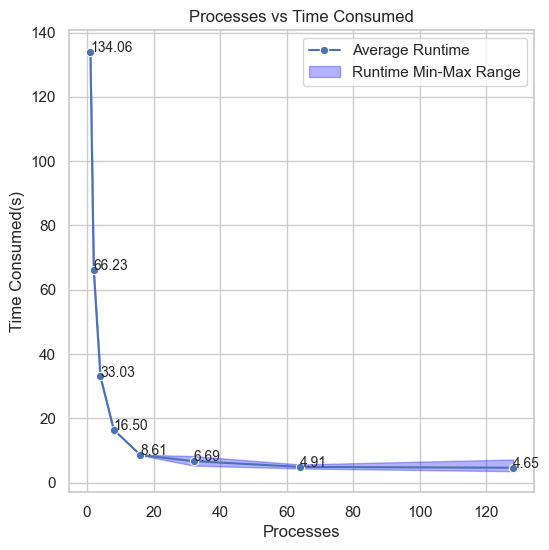

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.DataFrame()
_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1, 2, 4, 8, 16, 32, 64, 128])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='runtime', data=df_avg, label='Average Runtime', marker='o')
for i in range(len(df_avg['runtime'])):
        plt.gca().text(df_avg['cpus'][i], df_avg['runtime'][i], str("{:.2f}".format(df_avg['runtime'][i])),fontsize = 10)
plt.fill_between(df_avg['cpus'], df_min['runtime'], df_max['runtime'], color='blue', alpha=0.3, label='Runtime Min-Max Range')


plt.xlabel('Processes')
plt.ylabel('Time Consumed(s)')
plt.title('Processes vs Time Consumed')
plt.legend()
plt.grid(True)

plt.savefig("runtime.svg")
plt.show()


   cpus     runtime
0     1  134.058007
1     2   66.225356
2     4   33.025642
3     8   16.495332
4    16    8.607952
5    32    6.690075
6    64    4.907604
7   128    4.645067
   cpus     runtime   speed_up ideal_speed_up
0     1  134.058007   1.000000            1.0
1     2   66.225356   2.024396            2.0
2     4   33.025642   4.059360            4.0
3     8   16.495332   8.127031            8.0
4    16    8.607952  15.574601           16.0
5    32    6.690075  20.423791           32.0
6    64    4.907604  27.486489           64.0
7   128    4.645067  29.791897          128.0


/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/2189574383.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/2189574383.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Min-Max Range', alpha=0.3)


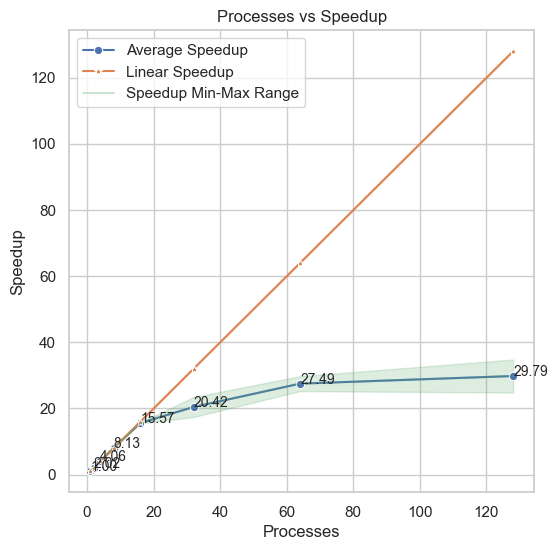

In [68]:
import pandas as pd

_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1, 2, 4, 8, 16, 32, 64, 128])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

group_size = 10
result_df = pd.DataFrame(columns=df.columns)
first_obtained = 134.058007

for i in range(0, len(df), group_size):
    group_df = df.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['runtime']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

print(df_all)
plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='speed_up', data=df_all, label='Average Speedup', marker='o')
sns.lineplot(x='cpus', y='ideal_speed_up', data=result_df, label='Linear Speedup', marker='*')

for i in range(len(df_all['runtime'])):
        plt.gca().text(df_all['cpus'][i], df_all['speed_up'][i], str("{:.2f}".format(df_all['speed_up'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Min-Max Range', alpha=0.3)



plt.xlabel('Processes')
plt.ylabel('Speedup')
plt.title('Processes vs Speedup')
plt.legend()
plt.grid(True)

plt.savefig("speedup.svg")
plt.show()


   cpus   runtime
0    32  5.967174
1    36  4.123509
2    40  3.427844
3    44  3.331069
4    48  4.955923


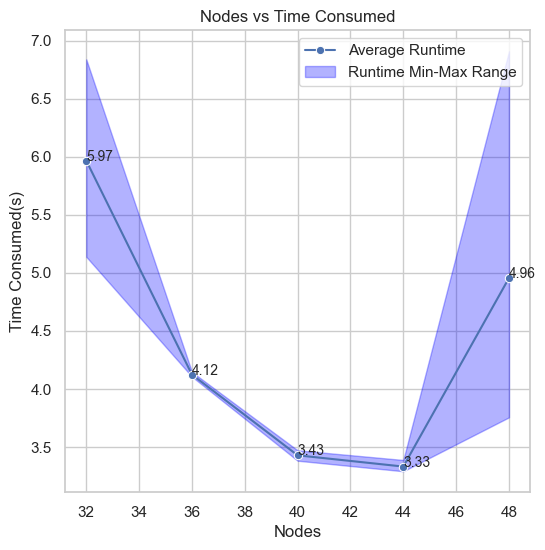

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.DataFrame()
_, _, data = new_extract_values_from_file('../result/thread_1_task_1.out',[32,36,40,44,48])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='runtime', data=df_avg, label='Average Runtime', marker='o')
for i in range(len(df_avg['runtime'])):
        plt.gca().text(df_avg['cpus'][i], df_avg['runtime'][i], str("{:.2f}".format(df_avg['runtime'][i])),fontsize = 10)
plt.fill_between(df_avg['cpus'], df_min['runtime'], df_max['runtime'], color='blue', alpha=0.3, label='Runtime Min-Max Range')


plt.xlabel('Nodes')
plt.ylabel('Time Consumed(s)')
plt.title('Nodes vs Time Consumed')
plt.legend()
plt.grid(True)

plt.savefig("48.svg")
plt.show()

    cpus     runtime
0      1  134.058007
1      4   33.025642
2      8   16.495332
3     16    8.607952
4     24    5.629123
5     32    6.690075
6     40    3.427638
7     48    4.953226
8     56    3.706600
9     64    4.907604
10    72    3.887064
11    80    4.263520
12    88    1.927081
13    96    5.600455
14   104    5.179020
15   112    5.496202
16   120    1.378312
17   128    4.645067
    cpus     runtime    speed_up ideal_speed_up
0      1  134.058007    1.000000            1.0
1      4   33.025642    4.059360            4.0
2      8   16.495332    8.127031            8.0
3     16    8.607952   15.574601           16.0
4     24    5.629123   23.815479           24.0
5     32    6.690075   20.423791           32.0
6     40    3.427638   39.113367           40.0
7     48    4.953226   27.871275           48.0
8     56    3.706600   36.188726           56.0
9     64    4.907604   27.486489           64.0
10    72    3.887064   34.496944           72.0
11    80    4.263520   32

/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/3069258532.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/3069258532.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Min-Max Range', alpha=0.3)


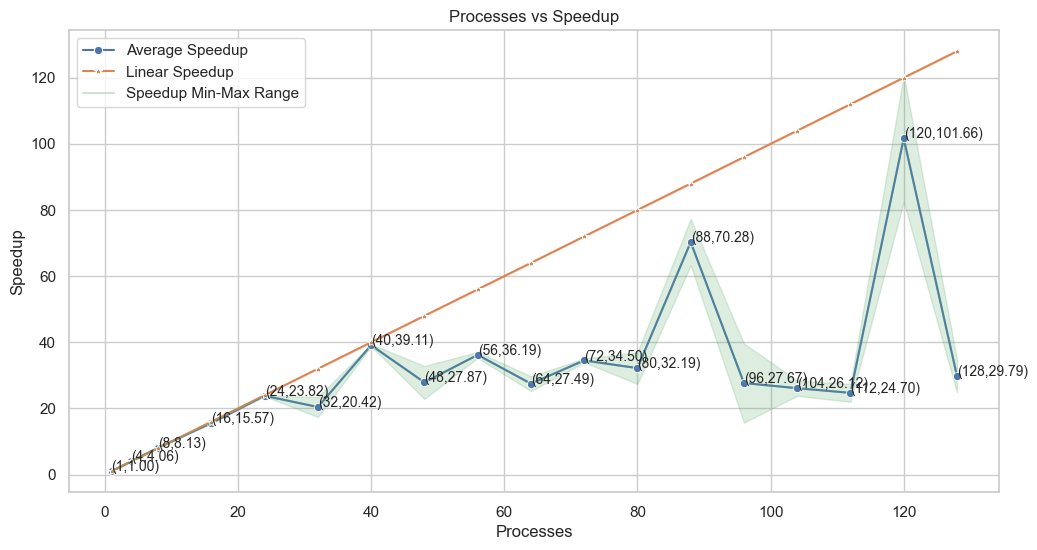

In [71]:
import pandas as pd

_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1, 4, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

group_size = 10
result_df = pd.DataFrame(columns=df.columns)
first_obtained = 134.058007

for i in range(0, len(df), group_size):
    group_df = df.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['runtime']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

for item in df_all:
      print(item)

plt.figure(figsize=(12, 6))
sns.lineplot(x='cpus', y='speed_up', data=df_all, label='Average Speedup', marker='o')
sns.lineplot(x='cpus', y='ideal_speed_up', data=result_df, label='Linear Speedup', marker='*')

for i in range(len(df_all['runtime'])):
        plt.gca().text(df_all['cpus'][i], df_all['speed_up'][i], str("({}".format(df_all['cpus'][i])+",{:.2f})".format(df_all['speed_up'][i]) ),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Min-Max Range', alpha=0.3)



plt.xlabel('Processes')
plt.ylabel('Speedup')
plt.title('Processes vs Speedup')
plt.legend()
plt.grid(True)

plt.savefig("speedup_extra.svg")
plt.show()

   cpus     runtime
0     1  134.058007
1     2   66.225356
2     4   33.025642
3     8   16.495332
4    16    8.607952
5    20    6.687524
6    24    5.629123
7    28    4.843955
8    32    6.690075


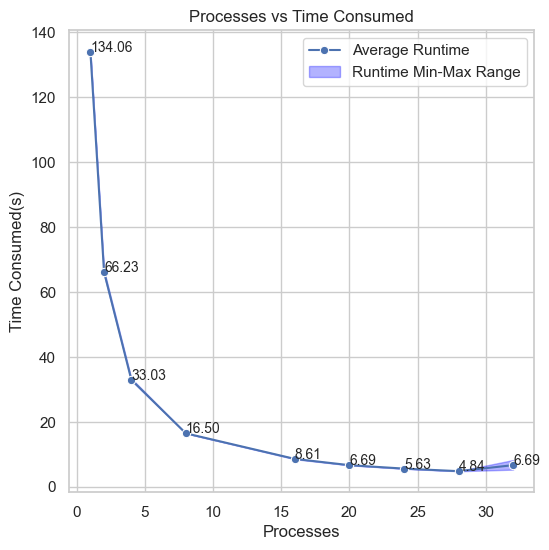

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.DataFrame()
_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1, 2, 4, 8, 16, 20, 24, 28, 32])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='runtime', data=df_avg, label='Average Runtime', marker='o')
for i in range(len(df_avg['runtime'])):
        plt.gca().text(df_avg['cpus'][i], df_avg['runtime'][i], str("{:.2f}".format(df_avg['runtime'][i])),fontsize = 10)
plt.fill_between(df_avg['cpus'], df_min['runtime'], df_max['runtime'], color='blue', alpha=0.3, label='Runtime Min-Max Range')


plt.xlabel('Processes')
plt.ylabel('Time Consumed(s)')
plt.title('Processes vs Time Consumed')
plt.legend()
plt.grid(True)

plt.savefig("runtime_ori.svg")
plt.show()

   cpus     runtime
0     1  134.058007
1     2   66.225356
2     4   33.025642
3     8   16.495332
4    16    8.607952
5    20    6.687524
6    24    5.629123
7    28    4.843955
8    32    6.690075
   cpus     runtime   speed_up ideal_speed_up
0     1  134.058007   1.000000            1.0
1     2   66.225356   2.024396            2.0
2     4   33.025642   4.059360            4.0
3     8   16.495332   8.127031            8.0
4    16    8.607952  15.574601           16.0
5    20    6.687524  20.046151           20.0
6    24    5.629123  23.815479           24.0
7    28    4.843955  27.675779           28.0
8    32    6.690075  20.423791           32.0


/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/855476840.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, group_df])
/var/folders/fn/tj1g13vd3z50dq_wfdkfryl40000gn/T/ipykernel_72588/855476840.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Min-Max Range', alpha=0.3)


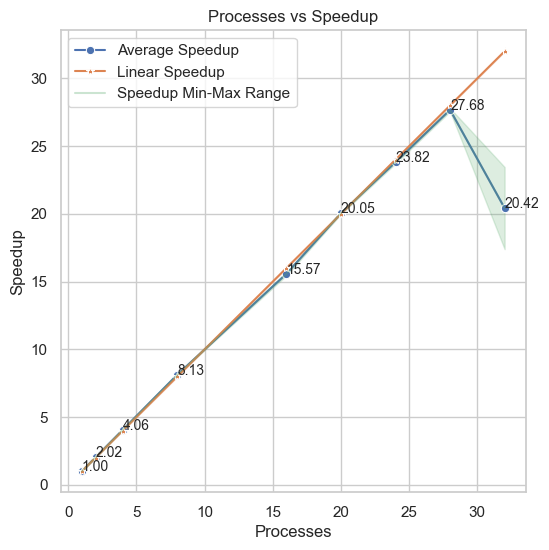

In [73]:
import pandas as pd

_, _, data = extract_values_from_file('../result/thread_1_task_1.out',[1, 2, 4, 8, 16, 20, 24, 28, 32])
df = pd.DataFrame(data)
#print(df)

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_avg = df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df.groupby('cpus').max().reset_index().iloc[start_with:]
print(df_avg)

group_size = 10
result_df = pd.DataFrame(columns=df.columns)
first_obtained = 134.058007

for i in range(0, len(df), group_size):
    group_df = df.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['runtime']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

print(df_all)
plt.figure(figsize=(6, 6))
sns.lineplot(x='cpus', y='speed_up', data=df_all, label='Average Speedup', marker='o')
sns.lineplot(x='cpus', y='ideal_speed_up', data=result_df, label='Linear Speedup', marker='*')

for i in range(len(df_all['runtime'])):
        plt.gca().text(df_all['cpus'][i], df_all['speed_up'][i], str("{:.2f}".format(df_all['speed_up'][i])),fontsize = 10)

# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Speedup Min-Max Range', alpha=0.3)



plt.xlabel('Processes')
plt.ylabel('Speedup')
plt.title('Processes vs Speedup')
plt.legend()
plt.grid(True)

plt.savefig("speedup_ori.svg")
plt.show()